# The Stock Market Works by Day, but It Loves the Night
> The daytime is for losers. Overnight is when the big money is made in the stock market — not by trading but by getting a good night’s sleep.
- toc: true
- branch: master
- author: Michael Hotaling
- badges: true
- comments: true
- categories: [jupyter, visualizations, matplotlib,python]
- hide: false
- show_image: false
- permalink: /night-market/
- hide_binder_badge: true
- hide_colab_badge: true

In [171]:
#hide
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.dates as mdates
import seaborn as sns
from datetime import timedelta as td
import matplotlib.ticker as mtick

Text(1989-01-01 00:00:00, 17, '@MichaelHotaling')

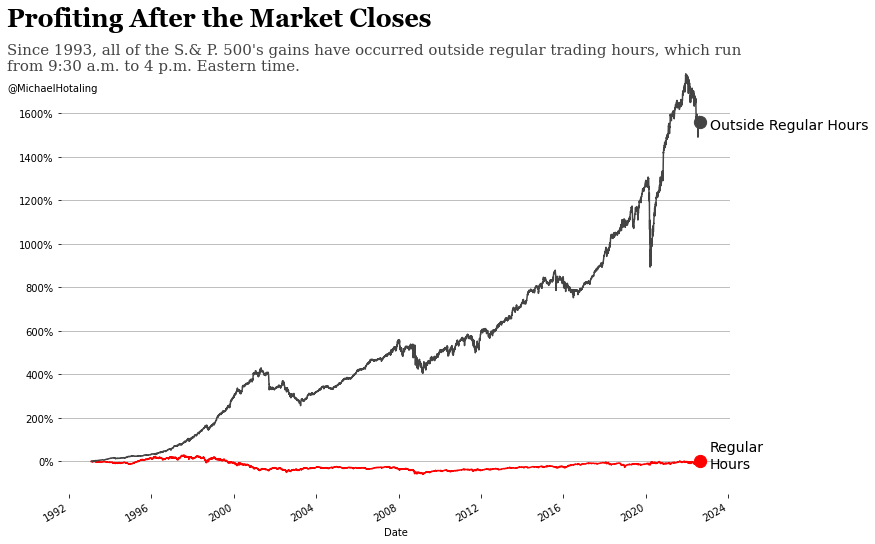

In [282]:
def point_plot(df, ax):
    x = df.iloc[-1:].reset_index()
    x.plot.scatter('Date', 'intraday_cum_returns', ax = ax, s = 150, color = 'red', zorder = 10)
    x.plot.scatter('Date', 'overnight_cum_returns', ax = ax, s = 150, color = '#444444', zorder= 10 )
    ax.text(x['Date'] + td(days = 180) , x['intraday_cum_returns']-0.3, "Regular\nHours", fontsize = 14)
    ax.text(x['Date'] + td(days = 180) , x['overnight_cum_returns']-0.3, "Outside Regular Hours", fontsize = 14)
    return df
    
fig, ax = plt.subplots(figsize=(12,9))
.5
(yf
 .Ticker("SPY")
 .history(period = 'max', back_adjust=True)
 .assign(intraday_pct_change = lambda x: (x['Close'] - x['Open']) / x['Open'],
         intraday_cum_returns = lambda x: (1 + x['intraday_pct_change']).cumprod() - 1,
         overnight_pct_change = lambda x: (x['Open'] - x['Close'].shift(1)) / x['Close'].shift(1),
         overnight_cum_returns= lambda x: (1 + x['overnight_pct_change']).cumprod() - 1
        )
 [['intraday_cum_returns',
   'overnight_cum_returns']]
 .pipe(point_plot, ax)
 .plot(logy=False, ax=ax, color = ['red','#444444'], legend = False)
)
plt.grid(axis= 'y')
[ax.spines[i].set_visible(False) for i in ['top','right','left','bottom']]
plt.ylabel("")
plt.yticks(range(0,18,2))
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
plt.text(datetime(1989,1,1), 20, "Profiting After the Market Closes",  font = "Georgia" ,size = 25,  fontweight='bold')
plt.text(datetime(1989,1,1), 18, "Since 1993, all of the S.& P. 500's gains have occurred outside regular trading hours, which run\nfrom 9:30 a.m. to 4 p.m. Eastern time.",  font = "Serif" ,size = 15,  fontweight='normal', color = '#444444')
plt.text(datetime(1989,1,1), 17, "@MichaelHotaling")

Text(1989-01-01 00:00:00, 19, '@MichaelHotaling')

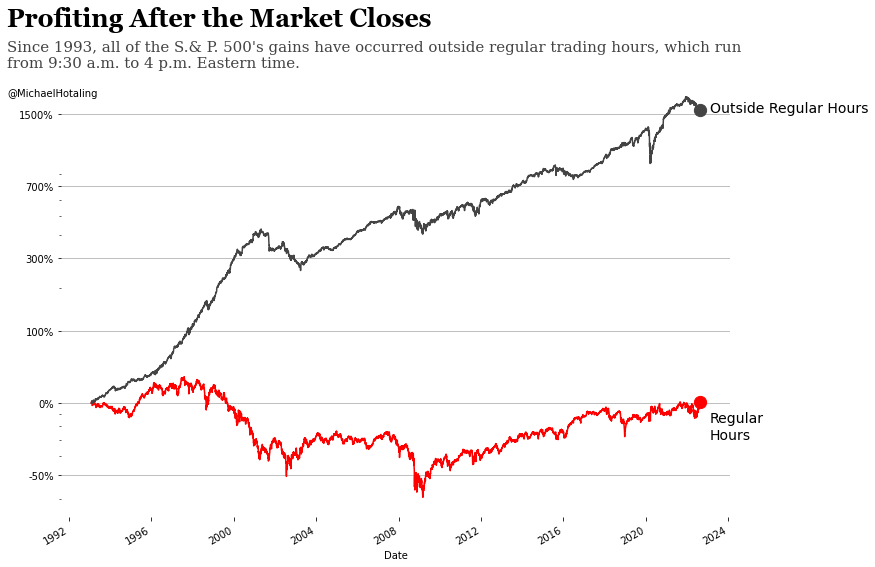

In [281]:
def point_plot(df, ax):
    x = df.iloc[-1:].reset_index()
    x.plot.scatter('Date', 'intraday_cum_returns', ax = ax, s = 150, color = 'red', zorder = 10)
    x.plot.scatter('Date', 'overnight_cum_returns', ax = ax, s = 150, color = '#444444', zorder= 10)
    ax.text(x['Date'] + td(days = 180) , x['intraday_cum_returns']-0.3, "Regular\nHours", fontsize = 14)
    ax.text(x['Date'] + td(days = 180) , x['overnight_cum_returns']-0.3, "Outside Regular Hours", fontsize = 14)
    return df
    
fig, ax = plt.subplots(figsize=(12,9))
.5
(yf
 .Ticker("SPY")
 .history(period = 'max', back_adjust=True)
 .assign(intraday_pct_change = lambda x: (x['Close'] - x['Open']) / x['Open'],
         intraday_cum_returns = lambda x: (1 + x['intraday_pct_change']).cumprod(),
         overnight_pct_change = lambda x: (x['Open'] - x['Close'].shift(1)) / x['Close'].shift(1),
         overnight_cum_returns= lambda x: (1 + x['overnight_pct_change']).cumprod()
        )
 [['intraday_cum_returns',
   'overnight_cum_returns']]
 .pipe(point_plot, ax)
 .plot(logy=True, ax=ax, color = ['red','#444444'], legend = False)
)
ax.grid(axis="y", )
    
[ax.spines[i].set_visible(False) for i in ['top','right','left','bottom']]
plt.ylabel("")
#plt.yticks(range(0,18,2))
ax.set_yticks([2**x for x in range(-1,5)])
ax.set_yticklabels(['{:.0%}'.format(x-1) for x in [2**x for x in range(-1,5)]])
plt.text(datetime(1989,1,1), 37, "Profiting After the Market Closes",  font = "Georgia" ,size = 25,  fontweight='bold')
plt.text(datetime(1989,1,1), 25, "Since 1993, all of the S.& P. 500's gains have occurred outside regular trading hours, which run\nfrom 9:30 a.m. to 4 p.m. Eastern time.",  font = "Serif" ,size = 15,  fontweight='normal', color = '#444444')
plt.text(datetime(1989,1,1), 19, "@MichaelHotaling")